In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data_path = "/content/drive/MyDrive/VPN Deprecated/data"
out_path = "/content/drive/MyDrive/VPN Deprecated/Output"

In [3]:
filename = f'{data_path}/keywords.txt'

In [4]:
tuples = []
with open(filename, 'r') as file:
    lines = file.readlines()

    for line in lines:
      arr = line.strip().replace('(','').replace(')','').split(',')
      tuples.append(tuple([i.strip() for i in arr]))

In [8]:
# =========================
# LOAD DATA
# =========================
df = pd.DataFrame(
    tuples,
    columns=["app", "source", "keyword", "classification"]
)

# Safety cleanup
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# =========================
# AGGREGATE COUNTS
# =========================
counts = (
    df.groupby(["app", "classification"])
      .size()
      .reset_index(name="count")
)


/tmp/ipython-input-2176637412.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [17]:
df['keyword'].unique()
num_apps = len(df['app'].unique())
keywords = df['keyword'].unique()
for i in keywords:
  tmp_df = df[df['keyword'] == i]
  if tmp_df['app'].unique().size == num_apps:
    print(i)

bypass


In [18]:
categories = df['classification'].unique()
for i in categories:
  tmp_df = df[df['classification'] == i]
  keywords = tmp_df['keyword'].unique()
  print(f"{i}: {','.join(keywords)}")

Blocking & Filtering: block,censorship,firewall
Stealth & Obfuscation: stealth,hidden,DPI,disguise,obfuscation,camouflage
Circumvention & Access: censorship,restricted,bypass,unblock,unavailable,access,Restriction,
Geo & Policy Framing: country,geographic,government,geo,surveillance,region,ISP,geo-block
Circumvention & Access  – see if put as unblock: access
Censorship: censorship
unblockBlocking & Filtering: block


In [27]:
df.groupby('keyword').count()

,app,source,classification
keyword,,,
,1,1,1
DPI,1,1,1
ISP,2,2,2
Restriction,1,1,1
access,8,8,8
block,15,15,15
bypass,15,15,15
camouflage,1,1,1
censorship,14,14,14


/tmp/ipython-input-1186179493.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


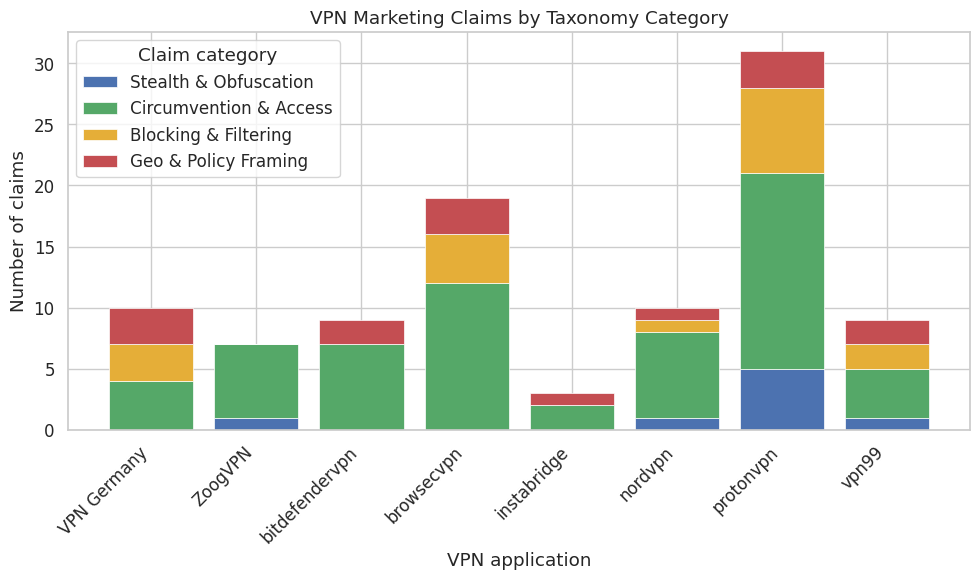

In [5]:
# Optional: normalize per app
NORMALIZE = False
if NORMALIZE:
    counts["count"] = counts.groupby("app")["count"].transform(
        lambda x: x / x.sum()
    )

# =========================
# TAXONOMY ORDER
# =========================
category_order = [
    "Stealth & Obfuscation",
    "Circumvention & Access",
    "Blocking & Filtering",
    "Geo & Policy Framing",
]

counts["classification"] = pd.Categorical(
    counts["classification"],
    categories=category_order,
    ordered=True
)

# =========================
# MUTED, COHESIVE PALETTE
# =========================
palette = [
    "#4C72B0",  # muted blue
    "#55A868",  # muted green
    "#E5AE38",  # muted rust
    "#C44E52",  # muted purple
]

color_map = dict(zip(category_order, palette))

# =========================
# PLOT
# =========================
sns.set_theme(style="whitegrid", font_scale=1.1)

fig, ax = plt.subplots(figsize=(10, 6))

bottoms = {}
apps = counts["app"].unique()

for cat in category_order:
    subset = counts[counts["classification"] == cat]

    values = []
    for app in apps:
        v = subset.loc[subset["app"] == app, "count"]
        values.append(v.iloc[0] if not v.empty else 0)

    bottoms_list = [bottoms.get(app, 0) for app in apps]

    ax.bar(
        apps,
        values,
        bottom=bottoms_list,
        label=cat,
        color=color_map[cat],
        edgecolor="white",
        linewidth=0.5
    )

    for i, app in enumerate(apps):
        bottoms[app] = bottoms.get(app, 0) + values[i]

# =========================
# LABELS & LEGEND
# =========================
ax.set_ylabel("Fraction of claims" if NORMALIZE else "Number of claims")
ax.set_xlabel("VPN application")
ax.set_title("VPN Marketing Claims by Taxonomy Category")

ax.legend(
    title="Claim category",
#    bbox_to_anchor=(1.02, 1),
#    loc="upper left",
#    frameon=False
)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{out_path}/keywords_categories.pdf", format='pdf' , dpi=300)
plt.show()

In [ ]:
df

,app,source,keyword,classification
0,protonvpn,GUI,block,Blocking&Filtering
1,protonvpn,GUI,stealth,Stealth&Obfuscation
2,protonvpn,GUI,block,Blocking&Filtering
3,protonvpn,GUI,hidden,Stealth&Obfuscation
4,protonvpn,GUI,censorship,Circumvention&Access
...,...,...,...,...
92,VPNGermany,playstore,unblock,Circumvention&Access
93,VPNGermany,playstore,block,Blocking&Filtering
94,VPNGermany,playstore,ISP,Geo&PolicyFraming
95,VPNGermany,playstore,unblock,Circumvention&Access


/tmp/ipython-input-3836698212.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


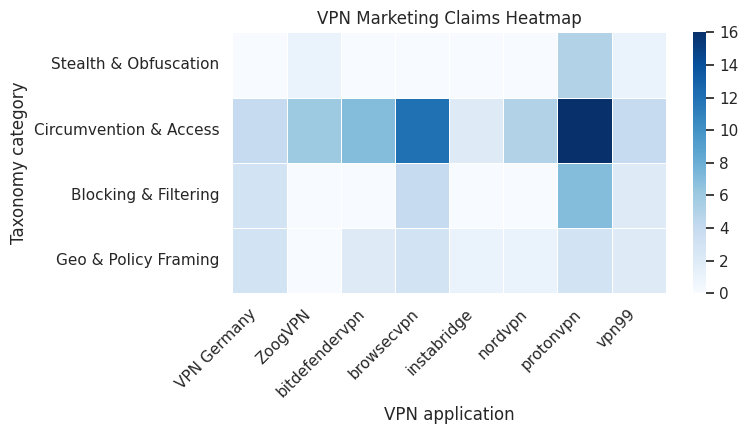

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(tuples, columns=["app", "source", "keyword", "classification"])
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# =========================
# TAXONOMY ORDER (LOCKED)
# =========================
category_order = [
    "Stealth & Obfuscation",
    "Circumvention & Access",
    "Blocking & Filtering",
    "Geo & Policy Framing",
]

# =========================
# AGGREGATE
# =========================
counts = (
    df.groupby(["app", "classification"])
      .size()
      .reset_index(name="count")
)

pivot = (
    counts
    .pivot(index="classification", columns="app", values="count")
    .fillna(0)
)

# enforce taxonomy order on rows
for c in category_order:
    if c not in pivot.index:
        pivot.loc[c] = 0
pivot = pivot.loc[category_order]

# Optional: normalize per category (row-wise) or per app (column-wise)
NORMALIZE = False
if NORMALIZE:
    pivot = pivot.div(pivot.sum(axis=1).replace(0, 1), axis=0)

# =========================
# HEATMAP
# =========================
sns.set_theme(style="white", font_scale=1.0)

fig, ax = plt.subplots(figsize=(max(8, 0.6 * len(pivot.columns)), 4.5))

sns.heatmap(
    pivot,
    ax=ax,
    cmap="Blues",
    linewidths=0.5,
    linecolor="white",
    cbar=True
)

ax.set_xlabel("VPN application")
ax.set_ylabel("Taxonomy category")
ax.set_title("VPN Marketing Claims Heatmap")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("vpn_claims_heatmap_transposed.png", dpi=300)
plt.show()
